 Problem Statement: Our friend Otis wants to sell his car but isn't sure about the price. He wants to maximize profit while ensuring a reasonable deal for buyers. To help Otis we will analyze the dataset and determine the factors affecting car prices.

# Import Required Python Libraries

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [14]:
df = pd.read_csv("carprice.csv")
df = df.iloc[:, 1:]
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Check for Missing Values

In [17]:
data = df
data.isna().any()
data.isnull().any()

symboling           False
CarName             False
fueltype            False
aspiration          False
doornumber          False
carbody             False
drivewheel          False
enginelocation      False
wheelbase           False
carlength           False
carwidth            False
carheight           False
curbweight          False
enginetype          False
cylindernumber      False
enginesize          False
fuelsystem          False
boreratio           False
stroke              False
compressionratio    False
horsepower          False
peakrpm             False
citympg             False
highwaympg          False
price               False
dtype: bool

In [30]:
data.columns    #check columns name

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [32]:
data.dtypes     #check datatype

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

# Convert MPG to L/100km
MPG (miles per gallon) convert into L/100km (liters per 100 kilometers)

In [56]:
data.price.unique()

data = data[data.price != '?']

data['price'] = data['price'].astype(int)


symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
city-L / 100km      float64
highwaympg            int64
price                 int32
dtype: object

# Normalize Features

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
200       Low
201    Medium
202    Medium
203    Medium
204    Medium
Name: price-binned, Length: 205, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']


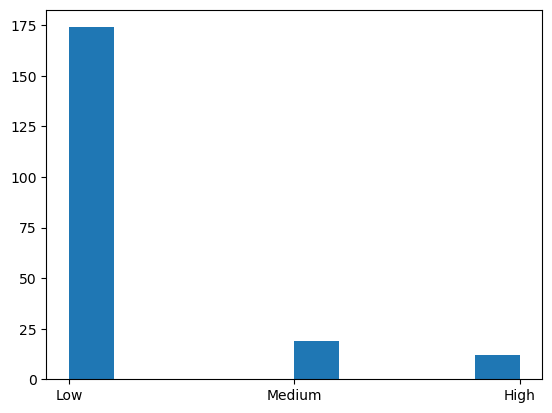

In [61]:
data['carlength'] = data['carlength']/data['carlength'].max()
data['carwidth'] = data['carwidth']/data['carwidth'].max()
data['carheight'] = data['carheight']/data['carheight'].max()

# binning- grouping values
bins = np.linspace(min(data['price']), max(data['price']), 4) 
group_names = ['Low', 'Medium', 'High']
data['price-binned'] = pd.cut(data['price'], bins, 
                              labels = group_names, 
                              include_lowest = True)

print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()

In [65]:
# Convert Categorical Data to Numerical
pd.get_dummies(data['fueltype']).head()

data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,city-L / 100km,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,0.836373,0.911588,0.898409,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,9.949525,30.751220,13276.702439
std,1.245307,6.021776,0.059285,0.029671,0.040862,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,2.573104,6.886443,7988.848977
min,-2.000000,86.600000,0.678039,0.834025,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,4.795918,16.000000,5118.000000
25%,0.000000,94.500000,0.799135,0.886584,0.869565,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,7.833333,25.000000,7788.000000
50%,1.000000,97.000000,0.832292,0.905947,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,9.791667,30.000000,10295.000000
75%,2.000000,102.400000,0.879865,0.925311,0.928094,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,12.368421,34.000000,16503.000000
max,3.000000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,18.076923,54.000000,45400.000000


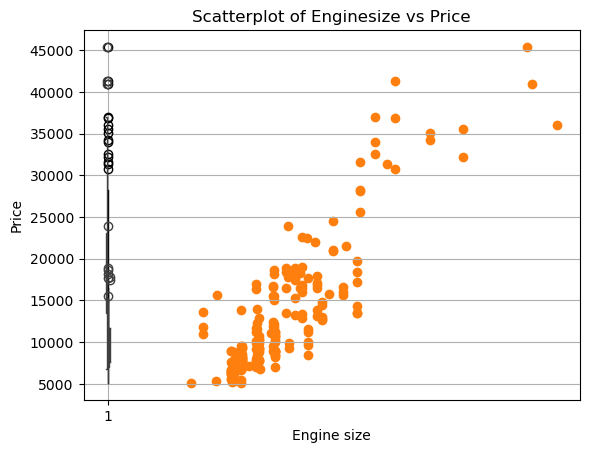

In [71]:
# Data Visualization
plt.boxplot(data['price'])

sns.boxplot(x ='drivewheel', y ='price', data = data)

plt.scatter(data['enginesize'], data['price'])
plt.title('Scatterplot of Enginesize vs Price')
plt.xlabel('Engine size')
plt.ylabel('Price')
plt.grid()
plt.show()

In [81]:
# Grouping Data by Drive-Wheels and Body-Style
test = data[['drivewheel', 'carbody', 'price']]
data_grp = test.groupby(['drivewheel', 'carbody'], 
                         as_index = False).mean()

data_grp

,drivewheel,carbody,price
0,4wd,hatchback,12731.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9780.368421
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


C:\Users\tanis\AppData\Local\Temp\ipykernel_1676\2084801674.py:7: MatplotlibDeprecationWarning: Getting the array from a PolyQuadMesh will return the full array in the future (uncompressed). To get this behavior now set the PolyQuadMesh with a 2D array .set_array(data2d).
  plt.colorbar()


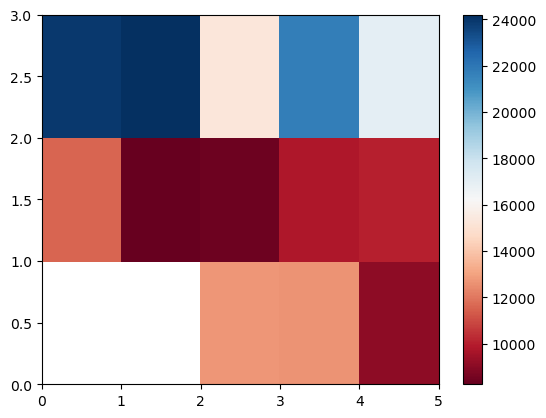

In [89]:
# Create a Pivot Table & Heatmap

data_pivot = data_grp.pivot(index = 'drivewheel',columns = 'carbody')
data_pivot

plt.pcolor(data_pivot, cmap ='RdBu')
plt.colorbar()
plt.show()

F_onewayResult(statistic=329.136587771185, pvalue=0.035055227319897055)


C:\Users\tanis\AppData\Local\Temp\ipykernel_1676\821399341.py:6: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_annova.get_group('audi 100ls')['price'],
C:\Users\tanis\AppData\Local\Temp\ipykernel_1676\821399341.py:7: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_annova.get_group('alfa-romero giulia')['price']


(0.0, 53534.24437074789)

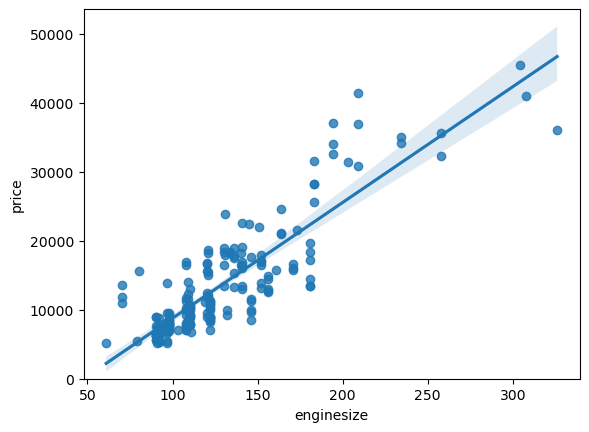

In [111]:
# Perform ANOVA Test
import scipy as sp
data_annova = data[['CarName', 'price']]
grouped_annova = data_annova.groupby(['CarName'])
annova_results_l = sp.stats.f_oneway(
                             grouped_annova.get_group('audi 100ls')['price'],
                             grouped_annova.get_group('alfa-romero giulia')['price']
                                    )
print(annova_results_l)

sns.regplot(x ='enginesize', y ='price', data = data)
plt.ylim(0, )